# Seaborn

Seaborn provides a high-level interface to Matplotlib, a powerful but sometimes unwieldy Python visualization library.

> Seaborn is a complement, not a substitute, for Matplotlib. There are some tweaks that still require Matplotlib

In [1]:
# Importing Libraries

# Pandas for managing datasets
import pandas as pd

# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline

# Seaborn for plotting and styling
import seaborn as sns

In [2]:
# Importing dataset

df = pd.read_csv('Pokemon.csv', index_col=0)
# index_col=0 simply means we'll treat the first column of the dataset as the ID column.

In [4]:
# Display first 5 observations
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


## Seaborn's plotting functions

One of Seaborn's greatest strengths is its diversity of plotting functions. For instance, making a **scatter plot** is just one line of code using the ```lmplot()``` function.

There are two ways you can do so.

* The first way (recommended) is to pass your DataFrame to the ```data=``` argument, while passing column names to the axes arguments, ```x=``` and ```y=```.
* The second way is to directly pass in Series of data to the axes arguments

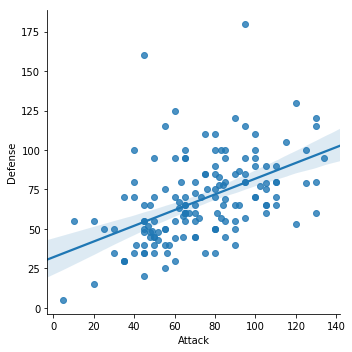

In [5]:
# Recommended way
sns.lmplot(x='Attack', y='Defense', data=df)

Seaborn doesn't have a dedicated scatter plot function, which is why you see a diagonal line. We actually used Seaborn's function for fitting and plotting a **regression line**.

Here's how we can tweak the ```lmplot()```:

* First, we'll set ```fit_reg=False``` to remove the regression line, since we only want a scatter plot.
* Then, we'll set ```hue='Stage'``` to color our points by the Pokémon's evolution stage.  
This hue argument is very useful because it allows you to express a third dimension of information using color.

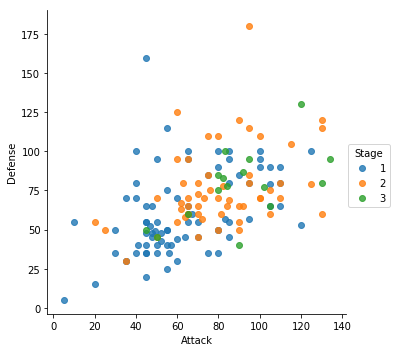

In [11]:
# Scatterplot arguments
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, # No regression line
           hue='Stage')  # Color by evolution stage

## Customizing with Matplotlib

Setting axes limits:

1. First, invoke your Seaborn plotting function as normal.
2. Then, invoke Matplotlib's customization functions. In this case, we'll use its ```ylim()``` and ```xlim()``` functions.

(0, 141.9881096001028)

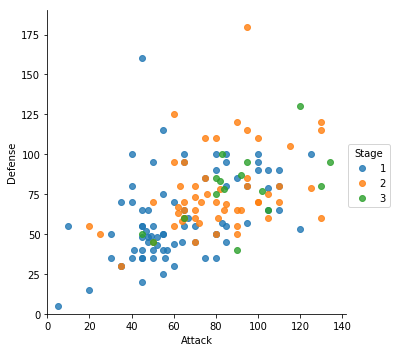

In [15]:
# Plot using Seaborn
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False,
           hue='Stage')

# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)

## Role of Pandas

Pandas actually plays a very important role  
Seaborn's plotting functions benefit from a base DataFrame that's reasonably formatted.

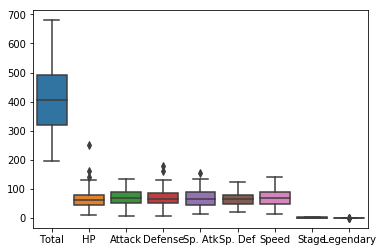

In [16]:
sns.boxplot(data=df)

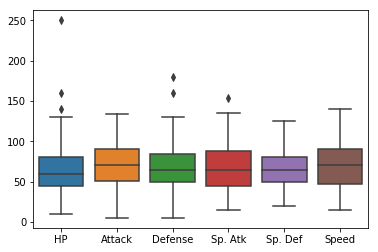

In [17]:
# Pre-format DataFrame
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)

# New boxplot using stats_df
sns.boxplot(data=stats_df)

## Seaborn themes

The default theme is called 'darkgrid'.  

Next, we'll change the theme to 'whitegrid' while making a violin plot.  

* Violin plots are useful alternatives to box plots.
* They show the distribution (through the thickness of the violin) instead of only the summary statistics.

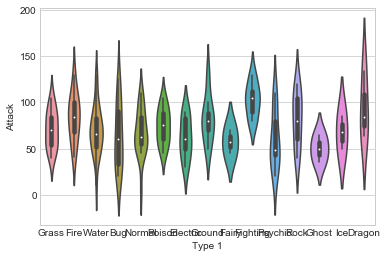

In [19]:
# Set theme
sns.set_style('whitegrid')

# Violin plot
sns.violinplot(x='Type 1', y='Attack', data=df)

## Color palattes

Seaborn allows us to set custom color palettes. We can simply create an ordered Python list of color hex values.

In [20]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

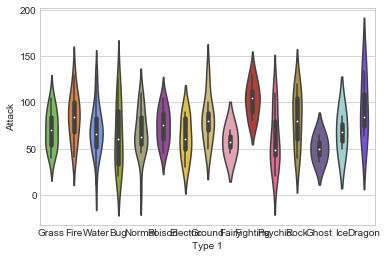

In [21]:
# Violin plot with Pokemon color palatte
sns.violinplot(x='Type 1', y='Attack', data=df,
              palette=pkmn_type_colors) # Set color palatte

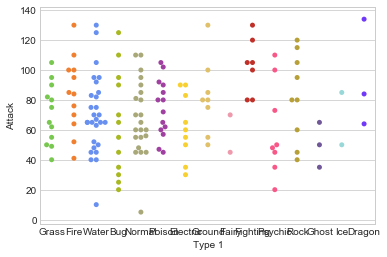

In [23]:
# Swarm plot with Pokemon color palatte
sns.swarmplot(x='Type 1', y='Attack', data=df,
              palette=pkmn_type_colors)

## Overlaying plots

It's pretty straightforward to overlay plots using Seaborn, and it works the same way as with Matplotlib. Here's what we'll do:

1. First, we'll make our figure larger using Matplotlib.
2. Then, we'll plot the violin plot. However, we'll set ```inner=None``` to remove the bars inside the violins.
3. Next, we'll plot the swarm plot. This time, we'll make the points black so they pop out more.
4. Finally, we'll set a title using Matplotlib.

Text(0.5,1,'Attack by Type')

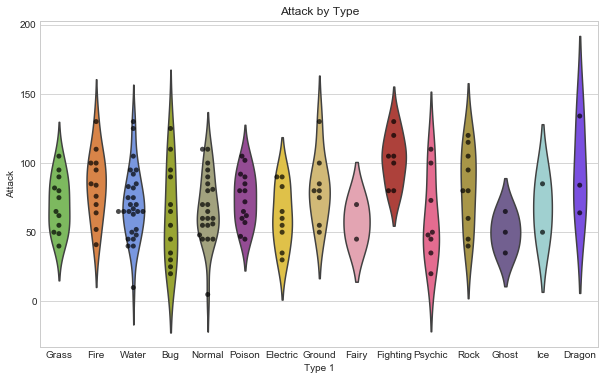

In [24]:
# Set figure size with Matplotlib
plt.figure(figsize=(10,6))

# Create plot
sns.violinplot(x='Type 1', y='Attack', data=df,
               inner=None, #Remove the bars inside the violins
               palette=pkmn_type_colors)

sns.swarmplot(x='Type 1', y='Attack', data=df,
              color='k', # Make points black
              alpha=0.7) # and slightly transparent

# Set title with matplotlib
plt.title('Attack by Type')

## Putting it all together

we could certainly repeat that chart for each stat.  
But we can also combine the information into one chart... we just have to do some **data wrangling** with Pandas beforehand.

In [25]:
stats_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
4,Charmander,Fire,NaN,39,52,43,60,50,65
5,Charmeleon,Fire,NaN,58,64,58,80,65,80


As you can see, all of our stats are in separate columns. Instead, we want to "melt" them into one column.

To do so, we'll use Pandas's ```melt()``` function. It takes 3 arguments:

* First, the DataFrame to melt.
* Second, ID variables to keep (Pandas will melt all of the other ones).
* Finally, a name for the new, melted variable.

In [31]:
# Melt DataFrames
melted_df = pd.melt(stats_df,
                    id_vars=['Name', 'Type 1', 'Type 2'], #Variables to keep
                    var_name='Stat') # Name of melted variable

#melted_df.head()
melted_df.tail()

,Name,Type 1,Type 2,Stat,value
901,Dratini,Dragon,NaN,Speed,50
902,Dragonair,Dragon,NaN,Speed,70
903,Dragonite,Dragon,Flying,Speed,80
904,Mewtwo,Psychic,NaN,Speed,130
905,Mew,Psychic,NaN,Speed,100


All 6 of the stat columns have been "melted" into one, and the new Stat column indicates the original stat (HP, Attack, Defense, Sp. Attack, Sp. Defense, or Speed).  

For example, it's hard to see here, but Bulbasaur now has 6 rows of data.

In [33]:
# Shape comparison
print(stats_df.shape)
print(melted_df.shape)

(151, 9)
(906, 5)


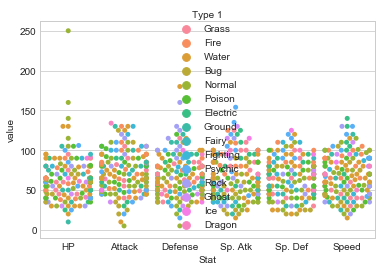

In [35]:
# Swarm plot with melted_df
sns.swarmplot(x='Stat', y='value', data=melted_df,
              hue='Type 1')

Finally, let's make a few final tweaks for a more readable chart:

1. Enlarge the plot.
2. Separate points by hue using the argument `split=True` .
> `split` parameter has been renamed to `dodge`
3. Use our custom Pokemon color palette.
4. Adjust the y-axis limits to end at 0.
5. Place the legend to the right.

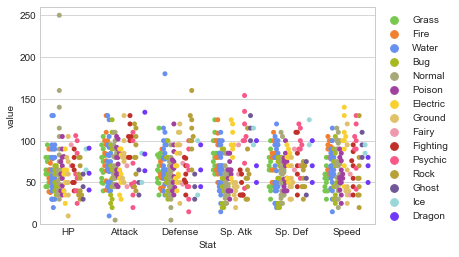

In [38]:
# 1. Enlarge the plot
plt.Figure(figsize=(10,6))

sns.swarmplot(x='Stat', y='value', data=melted_df,
              hue='Type 1',
              dodge=True, # 2. Separate points by hue
              # split parameter has been renamed to dodge
              palette=pkmn_type_colors) # 3. Use Pokemon palatte

# 4. Adjust the y-axis
plt.ylim(0, 260)

# 5. Place legend to the right
plt.legend(bbox_to_anchor=(1,1), loc=2)

## Pokedex (mini-gallery)

### Heatmap
> Heatmaps help you visualize matrix-like data.

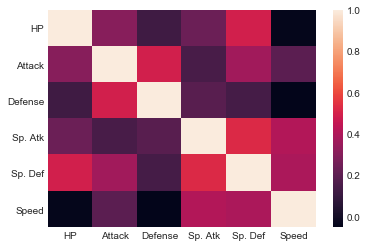

In [39]:
# Calculate correlations
corr = stats_df.corr()

# Heatmap
sns.heatmap(corr)

### Histogram
> Histograms allow you to plot the distributions of numeric variables.

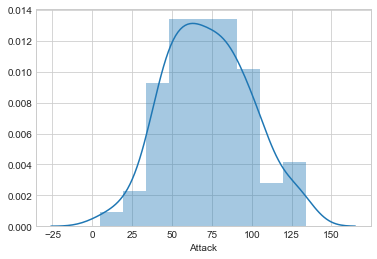

In [40]:
#Distribution Plot (a.k.a. Histogram)
sns.distplot(df.Attack)

### Bar Plot
> Bar plots help you visualize the distributions of categorical variables.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

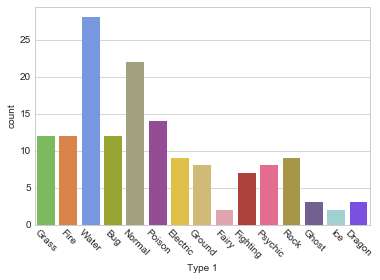

In [41]:
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)

# Rotate x-labels
plt.xticks(rotation=-45)

### Factor Plot
> Factor plots make it easy to separate plots by categorical classes.

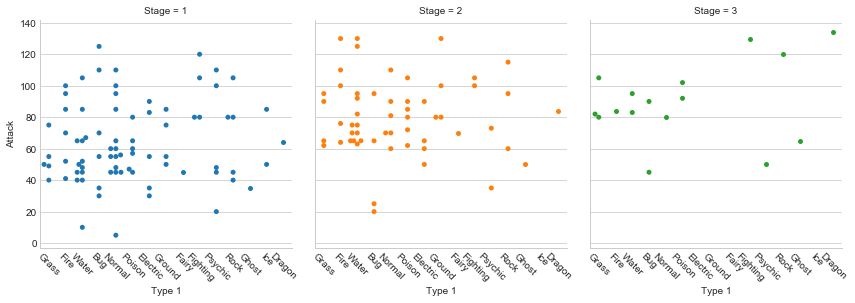

In [44]:
# Factor plot
g = sns.factorplot(x='Type 1', y='Attack', data=df,
                   hue='Stage', # Color by stage
                   col='Stage', # Separate by stage
                   kind='swarm')# Swarmplot

# Rotate x-axis labels
g.set_xticklabels(rotation=-45)

#Doesn't work because only rotates last plot
# plt.xticks(rotation=-45)

### Density Plot
> Density plots display the distribution between two variables.

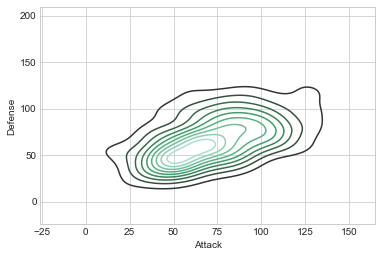

In [45]:
# Density plot
sns.kdeplot(df.Attack, df.Defense)

### Joint DIstribution Plot
> Joint distribution plots combine information from scatter plots and histograms to give you detailed information for bi-variate distributions.

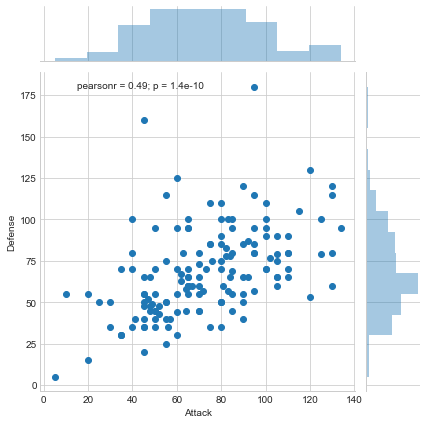

In [46]:
# Joint Distribution Plot
sns.jointplot(x='Attack', y='Defense', data=df)